In [2]:

# import basic libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
!pip install WordCloud
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline  

In [3]:
import spacy
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read csv data set 
emusk=pd.read_csv('Elon_musk.csv',encoding='latin-1')
emusk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
emusk.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
emusk.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [7]:
emusk.shape

(1999, 2)

In [8]:
emusk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [9]:
#Number of Words in single tweet
emusk['word_count'] = emusk['Text'].apply(lambda x: len(str(x).split(" ")))
emusk['word_count']

0        4
1       13
2        4
3        4
4       17
        ..
1994    23
1995    12
1996     4
1997     7
1998     4
Name: word_count, Length: 1999, dtype: int64

In [10]:
emusk[['Text','word_count']].head() 

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [11]:
#Number of characters in single tweet
emusk['char_count'] = emusk['Text'].str.len() ## this also includes spaces
emusk['char_count']

0        22
1        82
2        35
3        31
4       104
       ... 
1994    144
1995     77
1996     35
1997     59
1998     25
Name: char_count, Length: 1999, dtype: int64

In [12]:
emusk[['Text','char_count']].head() 

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


In [13]:
#Number of special characters
emusk['hashtags'] = emusk['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
emusk['hashtags']

0       1
1       1
2       2
3       1
4       1
       ..
1994    1
1995    1
1996    2
1997    1
1998    0
Name: hashtags, Length: 1999, dtype: int64

In [14]:
emusk[['Text','hashtags']].head() 

,Text,hashtags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


In [15]:
emusk=pd.read_csv('Elon_musk.csv',encoding='latin-1')
emusk.drop(['Unnamed: 0'],inplace=True,axis=1) 
emusk 

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [16]:
emusk.columns

Index(['Text'], dtype='object')

In [17]:
# remove both the leading and the trailing characters
emusk = [Text.strip() for Text in emusk.Text]  
# removes empty strings, because they are considered in Python as False
emusk = [Text for Text in emusk if Text]        
emusk[0:10]   

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [18]:
# Joining the list into one string/text
emusk_text = ' '.join(emusk)
emusk_text 

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [19]:
import string
# Punctuation
no_punc_text = emusk_text.translate(str.maketrans('', '', string.punctuation)) # with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [20]:
#remove https or url within text
import re 
no_url_text=re.sub(r'https\S+', '' , no_punc_text)
no_url_text 

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [21]:
import nltk
nltk.download('all')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords') 

[nltk_data] Error loading all: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [22]:
# tokenization 
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_url_text)
text_tokens[0:50]

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'Frodo',
 'was']

In [23]:
len(text_tokens) 

20424

In [24]:
# remove stopwords respectively
stop_words = stopwords.words('english')
stop_words.append('the')

In [25]:
stop_tokens = [word for word in text_tokens if not word in stop_words]
print(stop_tokens[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself']


In [26]:
# Noramalizing the data
lower_words = [x.lower() for x in stop_tokens]
lower_words[0:25]

['kunalb11',
 'i\x92m',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last']

In [27]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'geoffkeighley', 'unrealengin', 'it\x92', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u0001f923', 'thi', 'true', 'power', 'haha', 'freewalletorg', 'ani', 'cr

In [28]:
# NLP(Natural Language Progroming) english language model of spacy library
nlp = spacy.load('en_core_web_sm')   
nlp

In [29]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(stop_tokens))
doc 

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox Frodo underdoge All thought would fail Himself OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation The entertaining outcome likely GiveDirectly Just sent Just agree Clubhouse kanyewest geoffkeighley UnrealEngine Its getting real Bought Dogecoin lil X toddler hodler JoshManMode He definitely issues sentencing seems bit high freewalletorg Thanks fixing freewalletorg Please unlock account AstroJordy U0001F923U0001F923 This true power haha freewalletorg Any crypto wallet wont give private keys avoided costs freewalletorg Your app sucks RT SpaceX NASA selected Falcon Heavy launch first two elements lunar Gateway together one mission ajtourville Yes BLKMDL3 RationalEtienne Adamklotz Once predic

In [30]:
lemmas = [token.lemma_ for token in doc]
lemmas

['kunalb11',
 'I\x92m',
 'alien',
 'IDAACarmack',
 'Ray',
 'trace',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'have',
 'try',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'Doge',
 'underestimate',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'Frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 '-PRON-',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thank',
 'flcnhvy',
 'anonyx10',
 'indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'just',
 'send',
 'just',
 'agree',
 'Clubhouse',
 'kanyew',
 'geoffkeighley',
 'UnrealEngine',
 'it\x92s',
 'get',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'JoshManMode',
 '-PRON-',
 'definitely',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'high',
 'freewalletorg',
 'thank',
 'fix',
 'freew

In [31]:
# feature extraction 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer

CountVectorizer()

In [32]:
x = vectorizer.fit_transform(lemmas) 
x 

<15124x4319 sparse matrix of type '<class 'numpy.int64'>'
	with 14916 stored elements in Compressed Sparse Row format>

In [33]:
# vocabulary 
vectorizer.vocabulary_ 

{'kunalb11': 2055,
 'alien': 232,
 'idaacarmack': 1793,
 'ray': 2971,
 'trace': 3845,
 'cyberpunk': 967,
 'hdr': 1680,
 'nextlevel': 2508,
 'have': 1674,
 'try': 3879,
 'joerogan': 1975,
 'spotify': 3463,
 'great': 1614,
 'interview': 1904,
 'gtera27': 1633,
 'doge': 1120,
 'underestimate': 4013,
 'teslacn': 3691,
 'congratulations': 861,
 'tesla': 3685,
 'china': 745,
 'amazing': 258,
 'execution': 1329,
 'last': 2075,
 'year': 4288,
 'now': 2546,
 'next': 2507,
 'even': 1301,
 'happy': 1661,
 'new': 2504,
 'ox': 2661,
 'frodo': 1496,
 'underdoge': 4012,
 'all': 235,
 'thought': 3769,
 'would': 4264,
 'fail': 1365,
 'pron': 2891,
 'owensparks': 2658,
 'flcnhvy': 1438,
 'anonyx10': 287,
 'haha': 1647,
 'thank': 3728,
 'indeed': 1842,
 'tweets': 3903,
 'definitely': 1022,
 'represent': 3053,
 'realworld': 2996,
 'time': 3787,
 'allocation': 237,
 'the': 3736,
 'entertaining': 1257,
 'outcome': 2638,
 'likely': 2136,
 'givedirectly': 1581,
 'just': 2003,
 'send': 3238,
 'agree': 201,
 'c

In [42]:
print(vectorizer.get_feature_names_out()[50:100])

['23' '230' '24' '240am' '247teslanews' '25' '250' '250kw' '25d'
 '25gunsteslacom' '25k' '25th' '28' '28delayslater' '28th' '29' '2k' '2nd'
 '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800'
 '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445pm'
 '448' '4530000' '45thspacewing' '4680' '479000' '48' '4d' '4th']


In [35]:
print(x.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
x.toarray().shape

(15124, 4319)

In [37]:
# now find how bigrams and trigrams can be included 
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
vectorizer_ngram_range

CountVectorizer(max_features=100, ngram_range=(1, 3))

In [39]:
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(emusk)  
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [43]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray()) 

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
# TFIDF vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(emusk)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['0001f525' '0001f5a4' '0001f923' '0001f923 0001f923' '20' '28delayslater'
 '60' 'about' 'absolutely' 'accurate' 'actually' 'after' 'ai'
 'ajtourville' 'all' 'almost' 'also' 'although' 'am' 'amazing' 'amp' 'an'
 'and' 'any' 'appreciated' 'archillect' 'are' 'as' 'astro_doug'
 'astrobehnken' 'astrojordy' 'astronauts' 'at' 'at tesla'
 'austinbarnard45' 'autopilot' 'back' 'bad' 'bar' 'be' 'be great' 'been'
 'being' 'berlin' 'berniesanders' 'best' 'beta' 'better' 'between' 'big'
 'bit' 'boca' 'bocachicagal' 'body' 'booster' 'boringcompany' 'both'
 'build' 'but' 'but it' 'but we' 'by' 'c_bass3d' 'can' 'car' 'cargo'
 'cars' 'caspar_stanley' 'cleantechnica' 'close' 'co' 'come' 'coming'
 'coming soon' 'companies' 'confirmed' 'congratulations' 'cool' 'cost'
 'could' 'crew' 'crew dragon' 'data' 'day' 'days' 'definitely' 'design'
 'did' 'different' 'djsnm' 'do' 'doesn' 'doge' 'doing' 'dojo' 'don' 'done'
 'down' 'dragon' 'driving' 'droneship' 'early' 'earth' 'easy' 'electric'
 'energy' 'engine' 'en

In [49]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))      # Set figure size
    plt.imshow(wordcloud)             # Display image
    plt.axis("off");                 # No axis details

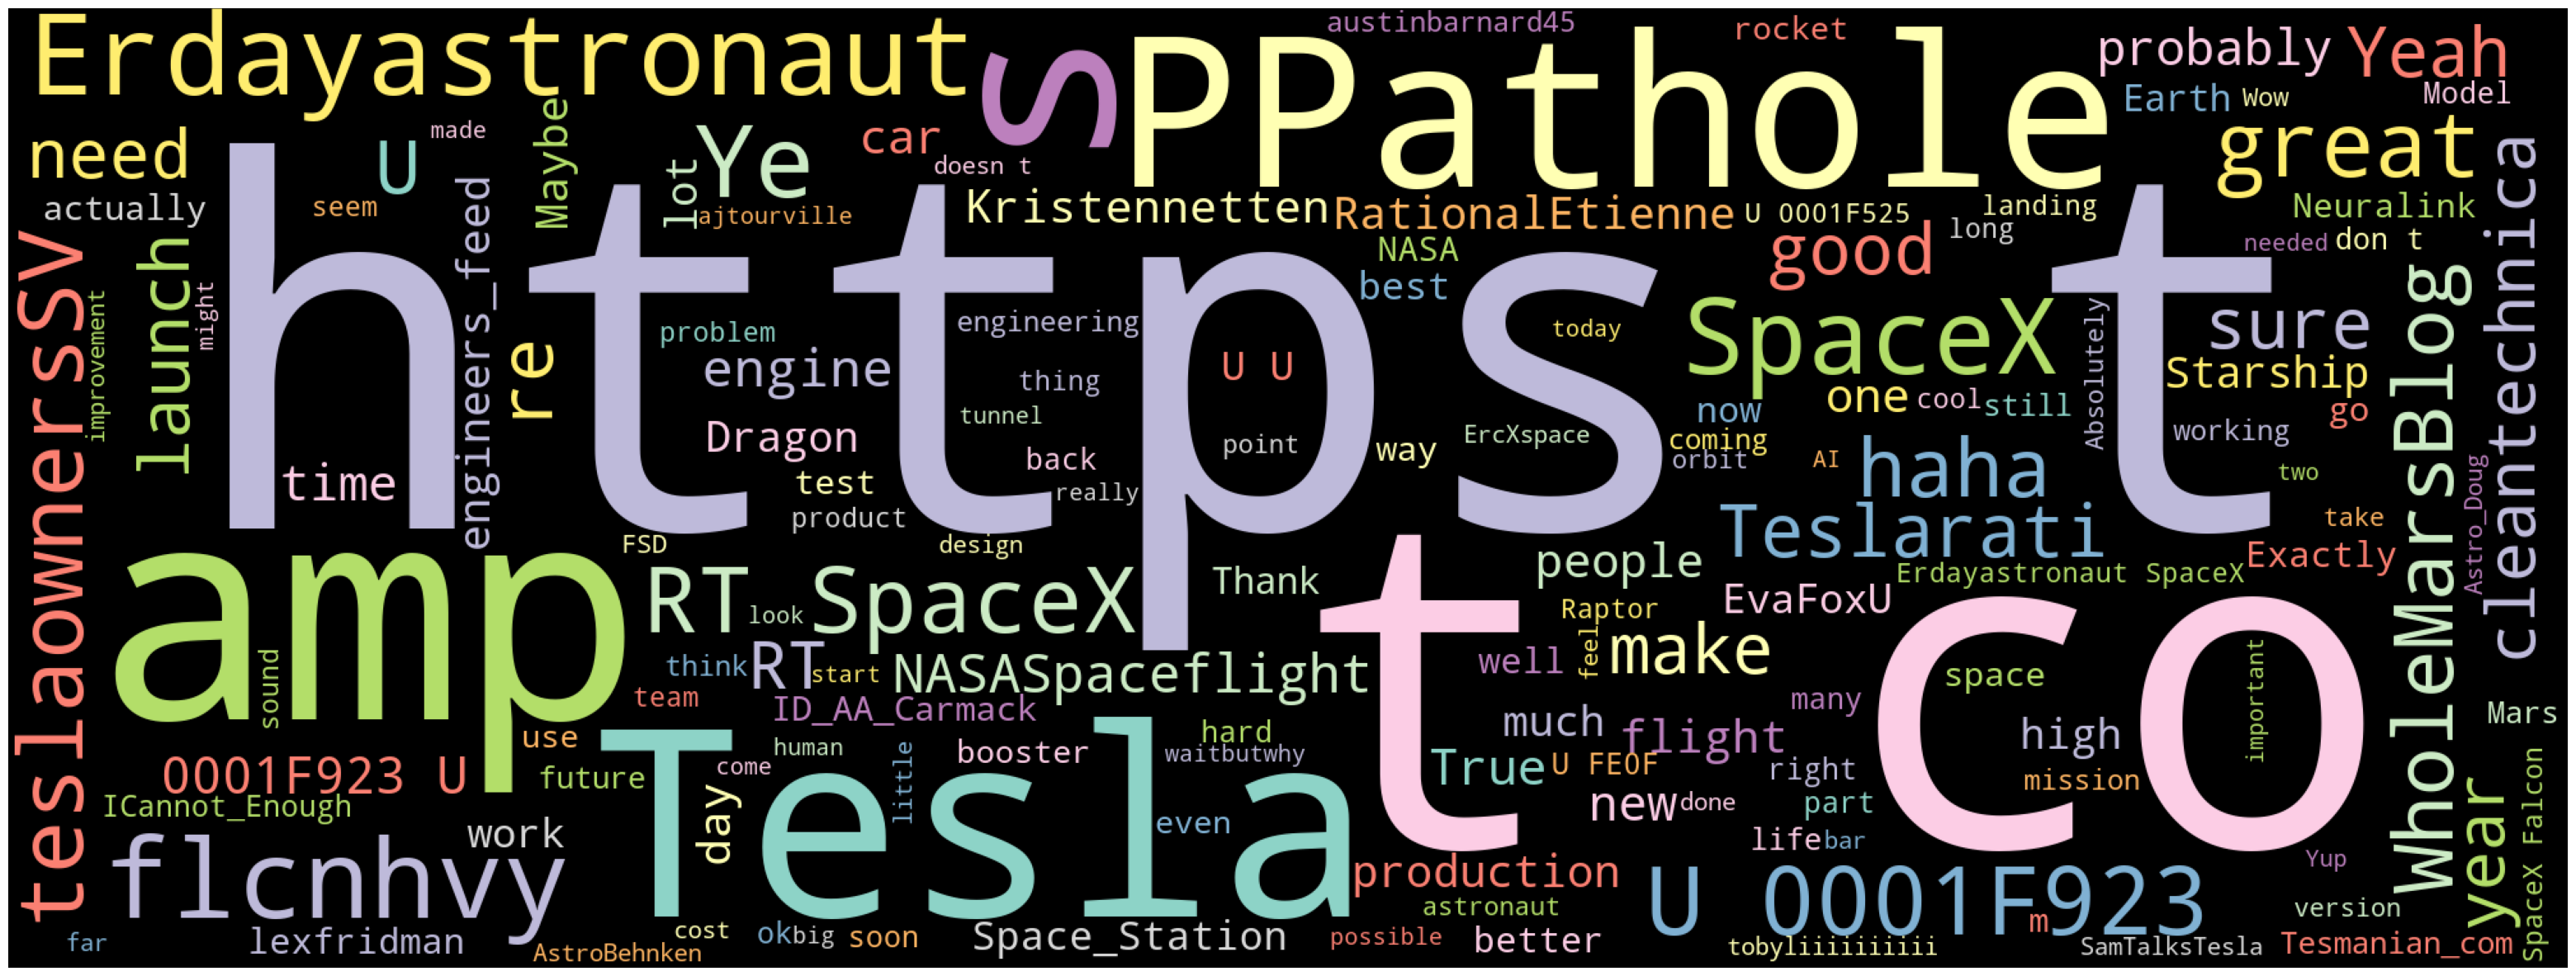

In [58]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 2000, height = 750, background_color='black', 
                      max_words=150,colormap='Set3',stopwords=stopwords).generate(emusk_text)
plot_cloud(wordcloud) 

In [61]:
# parts of speech tagging 
one_block = emusk[20]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True) 
print(one_block,doc_block)

@freewalletorg Any crypto wallet that wont give you your private keys should be avoided at all costs @freewalletorg Any crypto wallet that wont give you your private keys should be avoided at all costs


In [62]:
for token in doc_block[0:20]:
    print(token, token.pos_) 

@freewalletorg PUNCT
Any DET
crypto NOUN
wallet NOUN
that SCONJ
wont NOUN
give VERB
you PRON
your DET
private ADJ
keys NOUN
should VERB
be AUX
avoided VERB
at ADP
all DET
costs NOUN


In [65]:
# filtering for nouns and verbs
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
nouns_verbs

['crypto', 'wallet', 'won\x92t', 'give', 'keys', 'should', 'avoided', 'costs']

In [66]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv

CountVectorizer()

In [67]:
x = cv.fit_transform(nouns_verbs)
x 

<8x8 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [69]:
sum_words = x.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df 

,word,count
0,crypto,1
1,wallet,1
2,won,1
3,give,1
4,keys,1
5,should,1
6,avoided,1
7,costs,1


<Axes: title={'center': 'verbs and nouns'}, xlabel='word'>

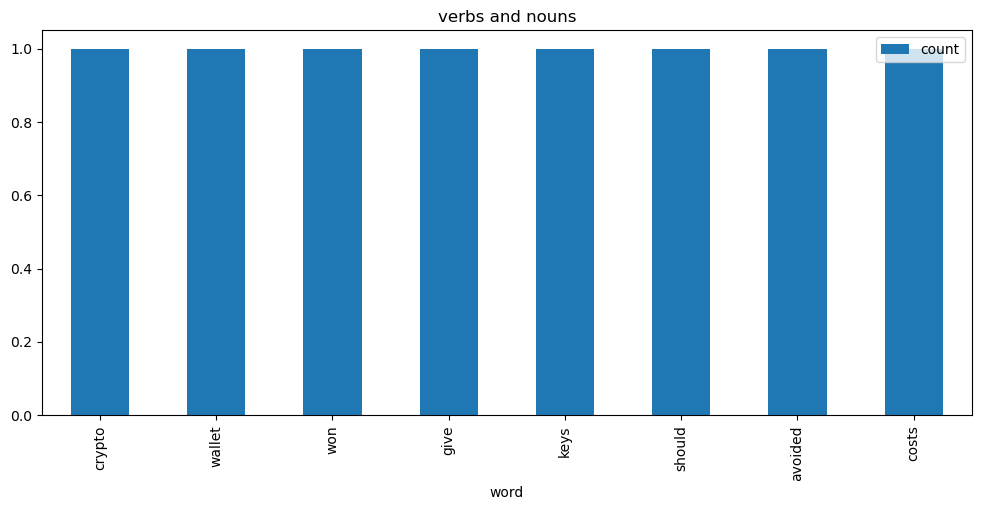

In [73]:
wf_df.plot.bar(x='word', figsize=(12,5), title='verbs and nouns') 

In [92]:
pip install  textblob 

Note: you may need to restart the kernel to use updated packages.


In [93]:
from textblob import TextBlob

In [94]:
data = pd.read_csv('Elon_musk.csv',encoding="latin-1")
data 

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [95]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [96]:
import warnings
warnings.filterwarnings('ignore')
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text']

0                                    kunalb11 Im an alien
1       ID_AA_Carmack Ray tracing on Cyberpunk with HD...
2                        joerogan Spotify Great interview
3                          gtera27 Doge is underestimated
4       teslacn Congratulations Tesla China for amazin...
                              ...                        
1994    flcnhvy True it sounds so surreal but the nega...
1995    PPathole Make sure to read ur terms amp condit...
1996                    TeslaGong PPathole Samwise Gamgee
1997    PPathole Altho Dumb and Dumber is U0001F525U00...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [97]:
data['Text'].head()

0                                 kunalb11 Im an alien
1    ID_AA_Carmack Ray tracing on Cyberpunk with HD...
2                     joerogan Spotify Great interview
3                       gtera27 Doge is underestimated
4    teslacn Congratulations Tesla China for amazin...
Name: Text, dtype: object

In [98]:
data['Text'][:5].apply(lambda x: TextBlob(x).sentiment) 

0                  (-0.25, 0.75)
1                     (0.0, 0.0)
2                    (0.8, 0.75)
3                     (0.0, 0.0)
4    (0.275, 0.3666666666666667)
Name: Text, dtype: object

In [99]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data['sentiment']

0      -0.250000
1       0.000000
2       0.800000
3       0.000000
4       0.275000
          ...   
1994    0.111111
1995    0.500000
1996    0.000000
1997   -0.375000
1998    0.000000
Name: sentiment, Length: 1999, dtype: float64

In [100]:
data[['Text','sentiment']].head() 

,Text,sentiment
0,kunalb11 Im an alien,-0.250
1,ID_AA_Carmack Ray tracing on Cyberpunk with HD...,0.000
2,joerogan Spotify Great interview,0.800
3,gtera27 Doge is underestimated,0.000
4,teslacn Congratulations Tesla China for amazin...,0.275
